# Задача 1 

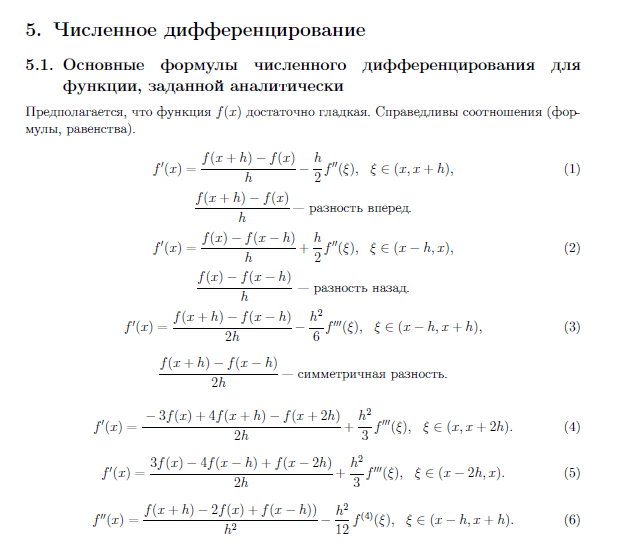

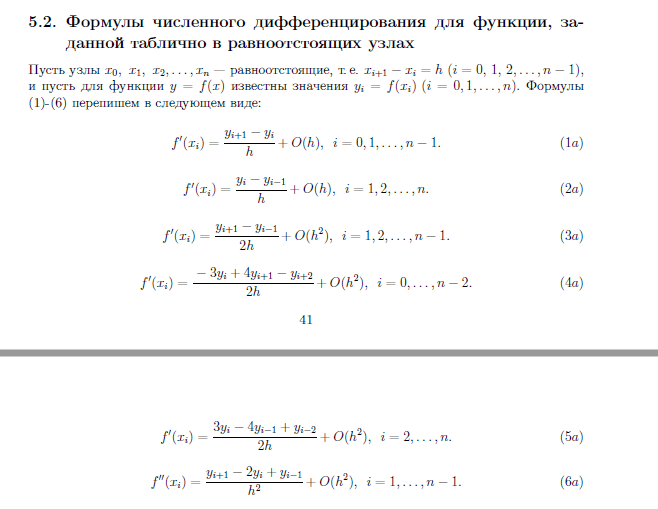

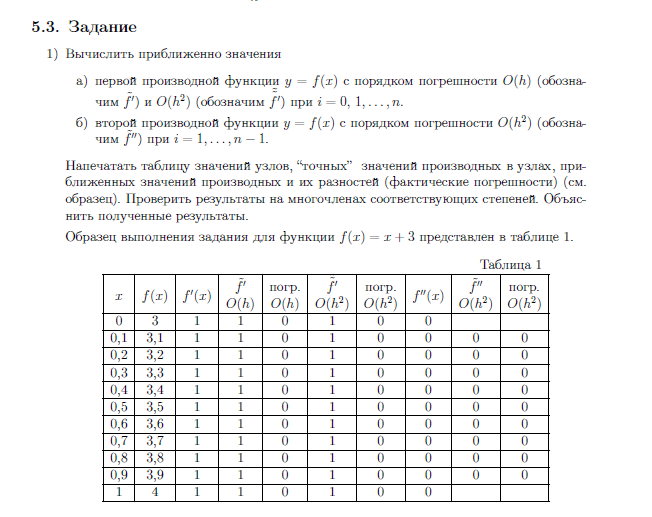

# Решение 

Подтянем зависимости.

In [19]:
import numpy as np
from math import sin, exp
from scipy import misc
from prettytable import PrettyTable

Реализуем все функции, приближённо вычисляющие производные.

In [2]:
# Разность вперёд.
def first_derivative_forward_first_error(f, h, x):
    return (f(x + h) - f(x))/h
    
# Разность назад.
def first_derivative_backward_first_error(f, h, x):
    return (f(x) - f(x - h))/h  

# Симметричная разность.
def first_derivative_symmetrical_second_error(f, h, x):
    return (f(x + h) - f(x - h))/(2*h)  

# Разность вперёд, O(h^2).
def first_derivative_forward_second_error(f, h, x):
    return ((-3)*f(x) + 4*f(x + h) - f(x + 2*h))/(2*h)
    
# Разность назад, O(h^2).
def first_derivative_backward_second_error(f, h, x):
    return (3*f(x) - 4*f(x - h) + f(x - 2*h))/(2*h)  

# Симметричная разность второй производной, O(h^2).
def second_derivative_symmetrical_second_error(f, h, x):
    return (f(x + h) - 2*f(x) + f(x - h))/(h**2)  

Зададим начальные данные.

In [3]:
start = 0
end = 1
step = 0.1
function = lambda x: sin(x)
accuracy = 4 # Знаков после запятой.

Посчитаем значения в столбцах.

In [4]:
# x.
x_list = list(map(lambda x: round(x, accuracy), np.arange(start, end + step, step)))

# f(x).
f_x_list = [round(function(i), accuracy) for i in x_list]

# f'(x).
f_derivative = [round(misc.derivative(function, i,  dx=1e-5), accuracy) for i in x_list] 

# f' O(h)
f_first_derivative_first_error = [round(first_derivative_forward_first_error(function, step, i), accuracy) for i in x_list[:-1]]
f_first_derivative_first_error.append(round(first_derivative_backward_first_error(function, step, x_list[-1]), accuracy))

# погр. O(h).
def list_subtraction(x, y):
    return list(map(lambda a, b: round(abs(a - b), accuracy), x, y))
f_first_error = list_subtraction(f_derivative, f_first_derivative_first_error)

# f' O(h^2).
f_first_derivative_second_error = [round(first_derivative_forward_second_error(function, step, i), accuracy) for i in x_list[:-1]]
f_first_derivative_second_error.append(round(first_derivative_backward_second_error(function, step, x_list[-1]), accuracy))

# погр. O(h^2).
f_second_error = list_subtraction(f_derivative, f_first_derivative_second_error)

# f''(x).
f_second_derivative = [round(misc.derivative(function, i,  dx=1e-5, n=2), accuracy) for i in x_list] 

# f'' O(h^2).
f_second_derivative_error = [round(second_derivative_symmetrical_second_error(function, step, i), accuracy) for i in x_list[1:-1]]
f_second_derivative_error.insert(0, '-')
f_second_derivative_error.append('-')

# погр. O(h^2).
f_second_derivative_second_error = list_subtraction(f_second_derivative[1:-1], f_second_derivative_error[1:-1])
f_second_derivative_second_error.insert(0, '-')
f_second_derivative_second_error.append('-')

Построим таблицу.

In [5]:
x = PrettyTable()

column_names = ["x", "f(x)", "f'(x)", "f' O(h)", "погр. O(h)", "f' O(h^2)", "погр. O(h^2)", "f''(x)", "f'' O(h^2)", "погр. O(h^2)"]

x.add_column(column_names[0], x_list)
x.add_column(column_names[1], f_x_list)
x.add_column(column_names[2], f_derivative)
x.add_column(column_names[3], f_first_derivative_first_error)
x.add_column(column_names[4], f_first_error)
x.add_column(column_names[5], f_first_derivative_second_error)
x.add_column(column_names[6], f_second_error)
x.add_column(column_names[7], f_second_derivative)
x.add_column(column_names[8], f_second_derivative_error)
x.add_column(column_names[9], f_second_derivative_second_error)

print(x)

+-----+--------+--------+---------+------------+-----------+--------------+---------+------------+--------------+
|  x  |  f(x)  | f'(x)  | f' O(h) | погр. O(h) | f' O(h^2) | погр. O(h^2) |  f''(x) | f'' O(h^2) | погр. O(h^2) |
+-----+--------+--------+---------+------------+-----------+--------------+---------+------------+--------------+
| 0.0 |  0.0   |  1.0   |  0.9983 |   0.0017   |   1.0033  |    0.0033    |   0.0   |     -      |      -       |
| 0.1 | 0.0998 | 0.995  |  0.9884 |   0.0066   |   0.9983  |    0.0033    | -0.0998 |  -0.0998   |     0.0      |
| 0.2 | 0.1987 | 0.9801 |  0.9685 |   0.0116   |   0.9833  |    0.0032    | -0.1987 |  -0.1985   |    0.0002    |
| 0.3 | 0.2955 | 0.9553 |  0.939  |   0.0163   |   0.9584  |    0.0031    | -0.2955 |  -0.2953   |    0.0002    |
| 0.4 | 0.3894 | 0.9211 |  0.9001 |   0.021    |   0.924   |    0.0029    | -0.3894 |  -0.3891   |    0.0003    |
| 0.5 | 0.4794 | 0.8776 |  0.8522 |   0.0254   |   0.8804  |    0.0028    | -0.4794 |   

# Задача 2

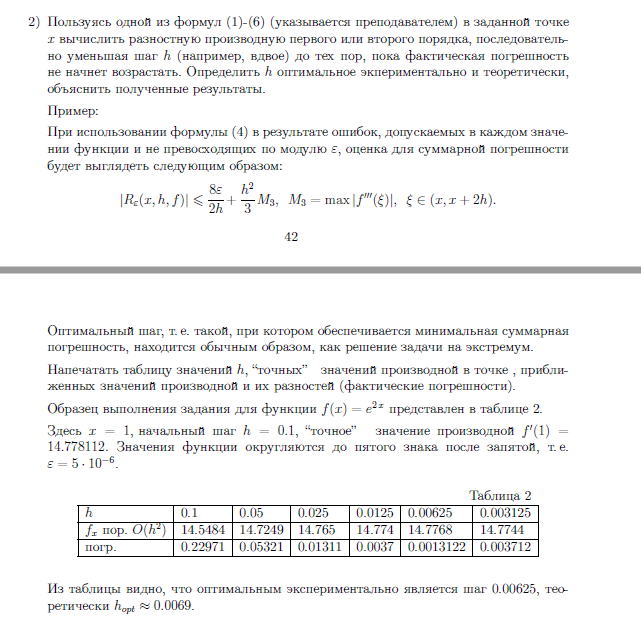

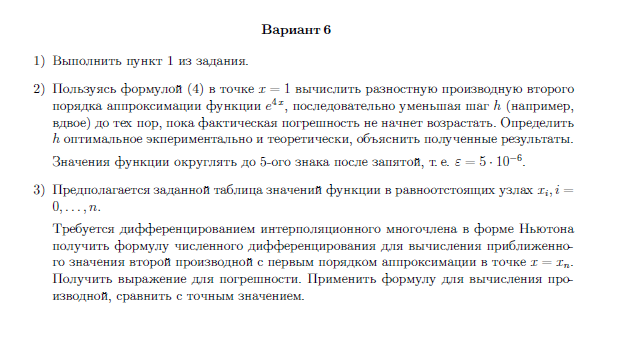

# Решение 

Зададим начальные данные.

In [22]:
point = 1
step = 0.1
step_loss = 0.5
step_num = 6
function = lambda x: exp(2*x)
accuracy = 5e-6 # Знаков после запятой.

Посчитаем точно значение производной.

In [23]:
f_derivative = misc.derivative(function, point,  dx=1e-5)

Посчитаем значения в строчках.

In [ ]:
# Шаги h.

# Приближённые значения производной f' пор. O(h^2).

# Погрешность

Построим таблицу.

In [25]:
x = PrettyTable()

x.field_names = ["City name", "Area", "Population", "Annual Rainfall"]

x.add_row(["Adelaide", 1295, 1158259, 600.5])
x.add_row(["Brisbane", 5905, 1857594, 1146.4])
x.add_row(["Darwin", 112, 120900, 1714.7])
x.add_row(["Hobart", 1357, 205556, 619.5])
x.add_row(["Sydney", 2058, 4336374, 1214.8])
x.add_row(["Melbourne", 1566, 3806092, 646.9])
x.add_row(["Perth", 5386, 1554769, 869.4])

print(x)

+-----------+---------+---------+---------+
|  Field 1  | Field 2 | Field 3 | Field 4 |
+-----------+---------+---------+---------+
|  Adelaide |   1295  | 1158259 |  600.5  |
|  Brisbane |   5905  | 1857594 |  1146.4 |
|   Darwin  |   112   |  120900 |  1714.7 |
|   Hobart  |   1357  |  205556 |  619.5  |
|   Sydney  |   2058  | 4336374 |  1214.8 |
| Melbourne |   1566  | 3806092 |  646.9  |
|   Perth   |   5386  | 1554769 |  869.4  |
+-----------+---------+---------+---------+
